In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from plots import big_fontsize, fig_width, fontsize, fig_height
from flarestack.cosmo import get_rate, define_cosmology_functions

No scratch directory has been set. Using home directory as default.


In [2]:
# Match flarestack convention
nsteps = 1e3
zrange, step = np.linspace(0.0, 8.0, int(nsteps + 1), retstep=True)
zplot = 0.5*(zrange[1:] + zrange[:-1])

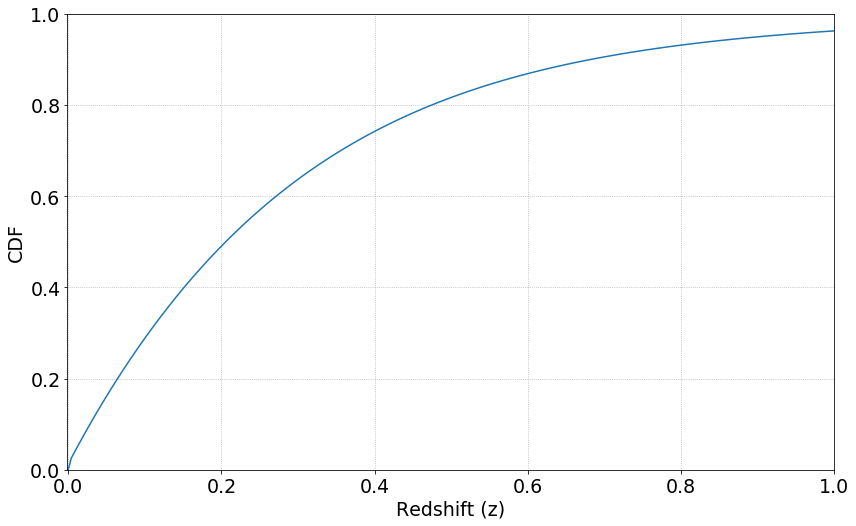

In [3]:
plt.figure(figsize=(fig_width * 2., fig_height * 2.))

rate_per_z, nu_flux_per_z, nu_flux_per_source, cumulative_nu_flux = \
        define_cosmology_functions(get_rate("TDE"), 1., gamma=2.5)

y = [x.value for x in cumulative_nu_flux(8.)]
y = np.array(y)/y[-1]

plt.plot([0.] + list(zplot), [0.] + list(y))

plt.xlim(-0.001, 1.)
plt.ylim(0, 1.)

plt.ylabel(r"CDF", fontsize=big_fontsize)
plt.xlabel(r"Redshift (z)", fontsize=big_fontsize)
plt.tick_params(axis='both', which='both', labelsize=big_fontsize)               
plt.grid(True, linestyle=":")
plt.tight_layout()

filename = "fig_s1_completeness.pdf"
plt.savefig(f"plots/{filename}")